# Feature Representation

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [85]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv') 
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')

## TODO: 
- standardizzare;
- fare separato per ciclisti e per gare;
- fare plot pca_components con feature originali e vedere risultati.

In [86]:
dataset['profile'] = dataset['profile'].astype('category')
numeric_dataset = dataset.select_dtypes(include="number")
race_features = ['length', 'climb_total', 'climb_percentage', 'startlist_quality', 'race_physical_effort', 'race_prestige', 'points']

# Estrarre solo le colonne delle gare
race_data = dataset[race_features].drop_duplicates()
race_data = race_data.dropna()

scaler = StandardScaler()
race_data_scaled = scaler.fit_transform(race_data)

pca_instance = PCA()
pca_transformation = pca_instance.fit_transform(race_data_scaled)

In [87]:
# variance per component
eigenvalues = pca_instance.explained_variance_
# variance per component, scaled to sum to 1
scaled_eigenvalues = pca_instance.explained_variance_ratio_
# eigenvectors, i.e., axes of reference
eigenvectors = pca_instance.components_


# norm of the whole transformation
transformation_norm_per_column = (pca_transformation ** 2).sum(axis=0)
cumulative_norm_per_reduction = np.cumsum(transformation_norm_per_column)

pca_dataframe = pd.DataFrame.from_records(
    zip(
        eigenvalues,
        scaled_eigenvalues,
        cumulative_norm_per_reduction
    ),
    columns=["eigenvalues", "scaled_eigenvalues", "transformation_norm"]
)
pca_dataframe

,eigenvalues,scaled_eigenvalues,transformation_norm
0,2.870428,0.409983,15144.377114
1,1.592574,0.227468,23546.799703
2,1.144989,0.163539,29587.760950
3,0.856777,0.122373,34108.114832
4,0.400312,0.057177,36220.159034
5,0.100844,0.014404,36752.213547
6,0.035403,0.005057,36939.000000


<Axes: xlabel='None', ylabel='scaled_eigenvalues'>

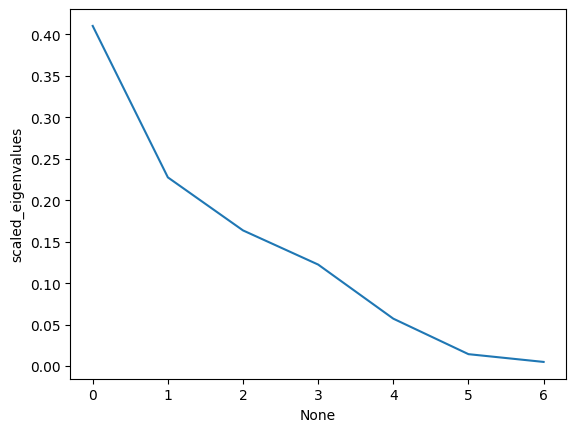

In [88]:
sb.lineplot(
    pca_dataframe,
    y="scaled_eigenvalues",
    x=pca_dataframe.index
)

In [89]:
pca_dataframe = pd.DataFrame(pca_transformation[:, :4], columns=["pca_1", "pca_2", "pca_3", "pca_4"])
original_and_transformed_dataframe = pd.concat(
    [
        race_data,
        pca_dataframe
    ],
    axis="columns"
)

<Axes: xlabel='pca_1', ylabel='pca_2'>

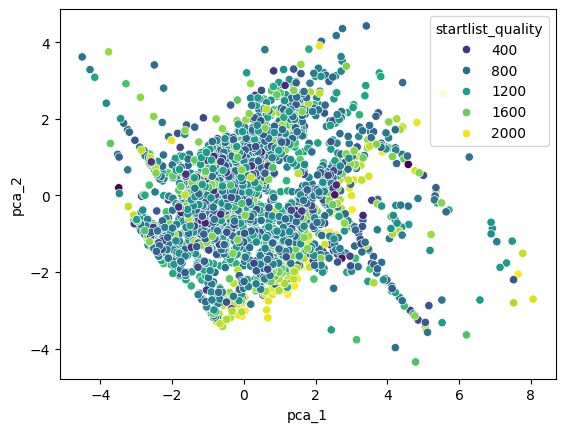

In [101]:
sb.scatterplot(
    original_and_transformed_dataframe,
    x="pca_1",
    y="pca_2",
    hue="startlist_quality",
    palette="viridis"
)